# Week 0: MNIST: Familiarize with Keras/TensorFlow

For part 2 of this week's coding challenge we will play with some of the convolutional neural network tools developed by Keras and TensorFlow by applying them to the MNIST dataset (for some background on the MNIST datatset, see [this link](http://neuralnetworksanddeeplearning.com/chap1.html)).

So the goal of this coding assigment is to play around with the hyperparameters (code cell 3) and neural network architecture (code cell 2 in the 
``` create_model() ``` 
function). Try adding or removing layers, try new [layer types ](https://www.tensorflow.org/api_docs/python/tf/keras/layers), changing the filter sizes, etc. See if you can improve the accuracy or runtime! My only recommendation is that you leave the final layer alone...don't touch or move the last dense layer of the model.


<center><img src='https://camo.githubusercontent.com/d440ac2eee1cb3ea33340a2c5f6f15a0878e9275/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067'></center>


For group meeting next week, please submit a colab notebook to the GitHub so we can see what you have come up with! 

---


disclaimer: most of this code was stolen from the tensorflow [website](https://colab.research.google.com/github/tensorflow/tensorboard/blob/master/docs/get_started.ipynb#scrollTo=A4UKgTLb9fKI) 

## Setting up our workspace
The first step will be importing useful modules for building our neural network.

In [1]:
# First we are going to make sure we are using the most up to date version of tensorflow
try:
# %tensorflow_version only exists in Colab.
  %tensorflow_version  2.0.0b1
except Exception:
  pass

# Load the TensorBoard notebook extension
# Tensorboard is a cool visualization component of tensorflow. 
# helps keep track of training metrics
%load_ext tensorboard

# Import tensorflow and datetime and TensorBoard
import tensorflow as tf
import datetime
from keras.callbacks import TensorBoard


# Clear any logs from previous runs
!rm -rf ./logs/ 

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.0.0b1`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


Using TensorFlow backend.


## Loading MNIST
Now we will load in the MNIST dataset. Thankfully, it is built into keras. Then split the dataset into training and testing portions. I encourage you to read up on training and test sets if you are unfamiliar. 

In [0]:
from keras.utils.np_utils import to_categorical

# Load Dataset
mnist = tf.keras.datasets.mnist

# Split Dataset into training and testing
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape to match convolutional layer
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

# Reshape Y train data into categorical
# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)



# Check shape of the data

In [3]:
print('x-shape:', x_train.shape)
print('y-shape:', y_train.shape)
print('first x-values:', 'not printing because ugly matrix; no one wants to see that')
print('first y-value:', y_train[0])

x-shape: (60000, 28, 28, 1)
y-shape: (60000,)
first x-values: not printing because ugly matrix; no one wants to see that
first y-value: 5


# Check what the data actually looks like

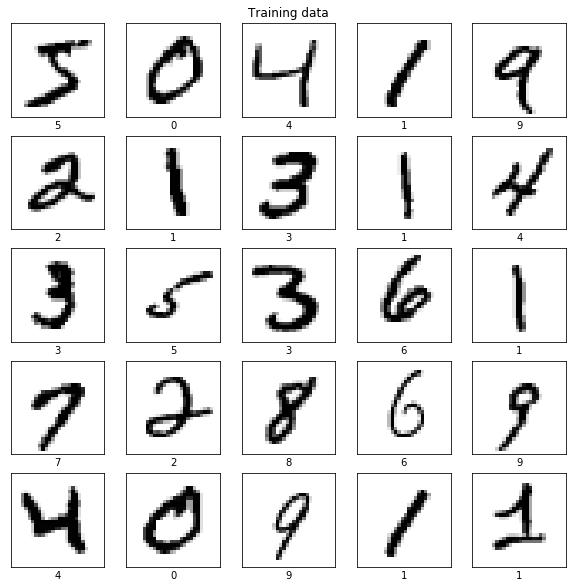

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    
    # Delete xticklabels because we don't care
    plt.xticks([])
    plt.yticks([])

    # We don't want a grid either
    plt.grid(False)

    # Plot image
    plt.imshow(x_train[i,: , :, 0], cmap=plt.cm.binary)

    # Put the label as xlabel
    plt.xlabel(y_train[i])

    # Put title above 3 image in first row
    if i==3-1:
      plt.title("Training data")

plt.show()

## Defining the architecture of our neural network

This is the block of code you should spend the most time playing with. 

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Convolution2D, \
                                    MaxPooling2D, Flatten, InputLayer
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a function to build a model 
def create_model():
    model = tf.keras.models.Sequential()
    model.add(InputLayer(input_shape=(28, 28, 1)))

    # 1st Convolutional Layer
    model.add(Convolution2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(.5))

    # # 2nd Convolutional Layer
    # model.add(Convolution2D(64, (3, 3), activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2,2)))
    # model.add(Dropout(.5))

    #### MOOOREEEE (S)LAAAAYYEEEEERRRSSSSS ############

    # # 3rd Convolutional Layer
    # model.add(Convolution2D(32, (3, 3), activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2,2)))
    # model.add(Dropout(.5))

    # Flattening
    model.add(Flatten())

    # Full Connection
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model

# Hyperparameters
num_epochs = 5   # An epoch is the number of times the network will see each instance of training data
adam = 'adam'
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
loss = 'sparse_categorical_crossentropy'
metrics = 'accuracy'

# Create model and summarize the 
model = create_model()
model.summary()

# Create Checkpoint for best model weights before overfitting
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'val_acc',
                               verbose=1,
                               save_best_only=True)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                346176    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

## Running the model

Now we will define, compile, and fit the model. The tensorboard_callback variable is just there to collect some of the training statistics so we can plot them later. 

In [6]:


model.compile(optimizer=adam,
              loss=loss,
              callbacks=[checkpointer],
              metrics=[metrics])


log_dir="logs/fit/" +datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

history = model.fit(x=x_train, 
                    y=y_train, 
                    epochs=num_epochs, 
                    validation_data=(x_test, y_test), 
                    callbacks=[tensorboard_callback])



Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 32s 537us/sample - loss: 0.3980 - accuracy: 0.8793 - val_loss: 0.0942 - val_accuracy: 0.9711
Epoch 2/5
60000/60000 [==============================] - 30s 508us/sample - loss: 0.1896 - accuracy: 0.9433 - val_loss: 0.0727 - val_accuracy: 0.9770
Epoch 3/5
60000/60000 [==============================] - 31s 514us/sample - loss: 0.1565 - accuracy: 0.9517 - val_loss: 0.0562 - val_accuracy: 0.9815
Epoch 4/5
60000/60000 [==============================] - 31s 512us/sample - loss: 0.1377 - accuracy: 0.9585 - val_loss: 0.0509 - val_accuracy: 0.9843
Epoch 5/5
60000/60000 [==============================] - 31s 514us/sample - loss: 0.1269 - accuracy: 0.9624 - val_loss: 0.0504 - val_accuracy: 0.9850


## TensorBoard

Tensorboard is a nice tool made by Tensorflow so you can see how your model trained. Check out all the tabs across the top of the window and see the different plots. Honestly, I am not sure what all of them mean, but they look cool. 

In [7]:
# %tensorboard --logdir logs/fit/
!kill 2096


/bin/bash: line 0: kill: (2096) - No such process


## Visualizing Accuracy

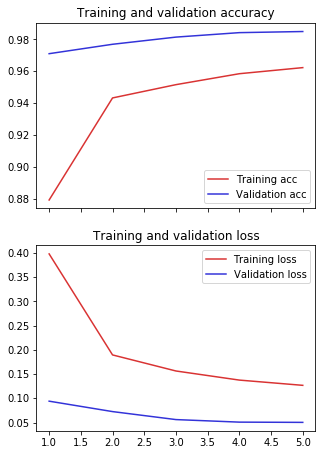

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

fig, ax = plt.subplots(2,1, figsize=(5,7.5), sharex=True)
# Accuracy plot
ax[0].plot(epochs, acc, c=(0.85, 0.2 ,0.2), label='Training acc')
ax[0].plot(epochs, val_acc, c=(0.2, 0.2 ,0.85), label='Validation acc')
ax[0].set_title('Training and validation accuracy')
ax[0].legend()

# Loss plot
ax[1].plot(epochs, loss, c=(0.85, 0.2 ,0.2), label='Training loss')
ax[1].plot(epochs, val_loss, c=(0.2, 0.2 ,0.85), label='Validation loss')
ax[1].set_title('Training and validation loss')
ax[1].legend()
plt.show()

# Exploring the convolutional layers


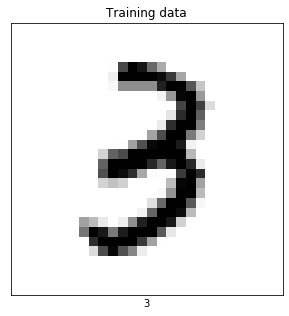

In [9]:
import numpy as np

# Generate Random integer
# Create same random number over and over by setting see number
np.random.seed(200892) 
ind = np.random.randint(0,10000)

x_fun = np.reshape(x_test[ind],(1, 28, 28, 1))
y_fun = y_test[ind]

plt.figure(figsize=(5,5))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(x_fun[0,:,:,0], cmap=plt.cm.binary)
plt.xlabel(y_fun)
plt.title("Training data")
plt.show()

## Predict class!

In [10]:
classes = model.predict_classes(x_fun, batch_size=10)
print("Predicted class is:",classes)


Predicted class is: [3]


Yay! It worked!

## Now let's look at the intermediate convolutional layers


In [11]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:12]] 
# Extracts the outputs of the top 12 layers
# Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) 

activations = activation_model.predict(x_fun) 
# Returns a list of five Numpy arrays: one array per layer activation

TypeError: ignored

## Some things to explore


1.   You will notice that if you just increase the number of training epochs, the model will become overfit, find some ways to reduce the overfitting problem.
2.   Try adding some convolutional layers
3.   You will notice that convolutional layers are 2D matrices, you can visualize them just like you would an image. It can be interesting to see what they look like. 
4.   There are dozens of hyperparameters. Explore the documentation for the layers and model.fit to see what might be interesting. 
5. If you can figure out how to view your models training progress as it trains, please share 

